In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
from IPython.display import Image
from keras.preprocessing import image
from keras import optimizers
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
#from keras impo
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D


Using TensorFlow backend.


In [2]:
from keras import Sequential

In [3]:
train_dir = '/home/aditya123/Downloads/aerial-cactus-identification/train'
test_dir = '/home/aditya123/Downloads/aerial-cactus-identification'
train='/home/aditya123/Downloads/aerial-cactus-identification/train.csv'


In [4]:
df_train = pd.read_csv('/home/aditya123/Downloads/aerial-cactus-identification/train.csv')

In [5]:
df_train.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [6]:
df_train.has_cactus=df_train.has_cactus.astype(str)

In [7]:
df_train['has_cactus'].value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

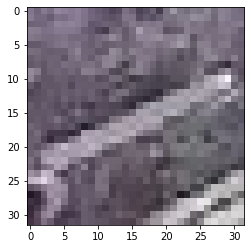

In [8]:
img=cv2.imread('/home/aditya123/Downloads/aerial-cactus-identification/train/0a02cef73a1660adad8fc43b07fa9d23.jpg')
plt.imshow(img)

In [9]:
datagen = ImageDataGenerator(rescale=1/255)

In [10]:
batch_size=150

In [11]:
model = InceptionV3(weights='imagenet',include_top=False,input_shape=(299,299,3))

In [105]:
print(os.getcwd())

/home/aditya123/Downloads/aerial-cactus-identification


In [12]:
train_generator = datagen.flow_from_dataframe(dataframe=df_train[:15001],directory=train_dir,x_col='id',
                                              y_col='has_cactus',class_mode = 'binary',batch_size=batch_size,
                                             target_size=(299,299))
validation_generator = datagen.flow_from_dataframe(dataframe=df_train[15000:],directory = train_dir,x_col='id',
                                                   y_col='has_cactus',class_mode='binary',batch_size=batch_size,
                                                  target_size=(299,299))

Found 15001 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


In [13]:
print(train_generator)

In [14]:
print(df_train[:15001])

                                         id has_cactus
0      0004be2cfeaba1c0361d39e2b000257b.jpg          1
1      000c8a36845c0208e833c79c1bffedd1.jpg          1
2      000d1e9a533f62e55c289303b072733d.jpg          1
3      0011485b40695e9138e92d0b3fb55128.jpg          1
4      0014d7a11e90b62848904c1418fc8cf2.jpg          1
...                                     ...        ...
14996  da70e9ca7e37baf3d1312d386d6ffa2e.jpg          1
14997  da7bbb4dc22e3fafcccc2a54f1d3eeaa.jpg          1
14998  da7ccb293cbb6bc7a966d540e404a4cc.jpg          1
14999  da8340dfcdf174c58ae0d77d0479e4cf.jpg          1
15000  da840573130a7f52d076de00e16d3b57.jpg          1

[15001 rows x 2 columns]


In [107]:
print(df_train[15000:])

                                         id has_cactus
15000  da840573130a7f52d076de00e16d3b57.jpg          1
15001  da889d8e040d62aee60659f256862de0.jpg          1
15002  da8ba92a6847703519dea3057772767b.jpg          1
15003  da8d7864cbc481821609724429347afa.jpg          0
15004  da8f378a8a0d85b0cd23c67865bbcf4e.jpg          1
...                                     ...        ...
17495  ffede47a74e47a5930f81c0b6896479e.jpg          0
17496  ffef6382a50d23251d4bc05519c91037.jpg          1
17497  fff059ecc91b30be5745e8b81111dc7b.jpg          1
17498  fff43acb3b7a23edcc4ae937be2b7522.jpg          0
17499  fffd9e9b990eba07c836745d8aef1a3a.jpg          1

[2500 rows x 2 columns]


In [95]:
import numpy as np

In [15]:
for layer in model.layers[:46]:
    layer.trainable = False
x = model.output
x = Flatten()(x)
x = Dense(256,activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(512,activation="relu")(x)
x = Dropout(0.2)(x)
pred = Dense(1,activation='sigmoid')(x)

In [16]:
model_final = Model(inputs=model.input,outputs = pred)

In [19]:
model_final.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [21]:
model_final.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['acc'])

In [18]:
steps=train_generator.n/train_generator.batch_size

In [19]:
print(steps)

100.00666666666666


In [37]:
val_steps=validation_generator.n//validation_generator.batch_size

In [38]:
print(val_steps)

16


In [ ]:
test=

In [41]:
print(train_generator[0])

(array([[[[0.75294125, 0.6431373 , 0.6901961 ],
         [0.75294125, 0.6431373 , 0.6901961 ],
         [0.75294125, 0.6431373 , 0.6901961 ],
         ...,
         [0.6392157 , 0.56078434, 0.60784316],
         [0.6392157 , 0.56078434, 0.60784316],
         [0.6392157 , 0.56078434, 0.60784316]],

        [[0.75294125, 0.6431373 , 0.6901961 ],
         [0.75294125, 0.6431373 , 0.6901961 ],
         [0.75294125, 0.6431373 , 0.6901961 ],
         ...,
         [0.6392157 , 0.56078434, 0.60784316],
         [0.6392157 , 0.56078434, 0.60784316],
         [0.6392157 , 0.56078434, 0.60784316]],

        [[0.75294125, 0.6431373 , 0.6901961 ],
         [0.75294125, 0.6431373 , 0.6901961 ],
         [0.75294125, 0.6431373 , 0.6901961 ],
         ...,
         [0.6392157 , 0.56078434, 0.60784316],
         [0.6392157 , 0.56078434, 0.60784316],
         [0.6392157 , 0.56078434, 0.60784316]],

        ...,

        [[0.48235297, 0.46274513, 0.44705886],
         [0.48235297, 0.46274513, 0.44705886

In [39]:
model_final.fit_generator(train_generator,steps_per_epoch=steps,validation_data=validation_generator,validation_steps=val_steps)

Epoch 1/1
101/100 [==============================] - 2206s 22s/step - loss: 0.0161 - acc: 0.9952 - val_loss: 0.8035 - val_acc: 0.7763
